# <center> Introduction to Spark In-memory Computing via Python PySpark </center>

In [1]:
!bash launch_spark_cluster.sh

Launching Spark cluster with the following parameters:
Master Node: node0314.palmetto.clemson.edu
Slave Nodes:
node0317.palmetto.clemson.edu
node0355.palmetto.clemson.edu
node0442.palmetto.clemson.edu
Temporary dir: /local_scratch/pbs.8742780.pbs02
Memory per worker (GB): 13G
Cores per worker: 8
Num workers: 3
. /home/aamle/software/spark-2.4.5-bin-hadoop2.7/sbin/start-all.sh -h node0314.palmetto.clemson.edu -d /local_scratch/pbs.8742780.pbs02 -m 13G -c 3
starting org.apache.spark.deploy.master.Master, logging to /home/aamle/software/spark-2.4.5-bin-hadoop2.7/logs/spark-aamle-org.apache.spark.deploy.master.Master-1-node0314.palmetto.clemson.edu.out
node0317.palmetto.clemson.edu: starting org.apache.spark.deploy.worker.Worker, logging to /home/aamle/software/spark-2.4.5-bin-hadoop2.7/logs/spark-aamle-org.apache.spark.deploy.worker.Worker-1-node0317.palmetto.clemson.edu.out
node0355.palmetto.clemson.edu: starting org.apache.spark.deploy.worker.Worker, logging to /home/aamle/software/spar

In [2]:
import sys
import os
import pyspark

env_spark_home=os.path.join(os.environ['HOME'],"software","spark-2.4.5-bin-hadoop2.7")
env_spark_conf_dir=os.path.join(env_spark_home,"conf")
env_pyspark_python=os.path.join("/software","anaconda3","5.1.0","bin","python")

os.environ['SPARK_HOME'] = env_spark_home
os.environ['SPARK_CONF_DIR'] = env_spark_conf_dir
os.environ['PYSPARK_PYTHON'] = env_pyspark_python

fp = open(os.path.join(env_spark_conf_dir,"master"))
node_list = fp.readlines()

import pyspark
conf = pyspark.SparkConf()
conf.setMaster("spark://" + node_list[0].strip() + ":7077")
conf.setAppName('big-data-workshop')
conf.set("spark.driver.memory","5g")
conf.set("spark.executor.instances", "3")
conf.set("spark.executor.memory","13g")
conf.set("spark.executor.cores","8")

sc = pyspark.SparkContext(conf=conf)

print(sc)

<SparkContext master=spark://node0314.palmetto.clemson.edu:7077 appName=big-data-workshop>


### Chicago Crime Data

**Spark SQL**
- Spark module for structured data processing
- provides more information about the structure of both the data and the computation being performed for additional optimization
- execute SQL queries written using either a basic SQL syntax or HiveQL

**DataFrame**
- a distributed collection of data organized into named columns
- conceptually equivalent to a table in a relational database or a data frame in R/Python, but with richer optimizations under the hood
- can be constructed from a wide array of sources such as: structured data files, tables in Hive, external databases, or existing RDDs

In [3]:
sqlContext = pyspark.SQLContext(sc)
df = sqlContext.read.format("com.databricks.spark.csv")\
    .option("header", "true")\
    .option("inferschema", "true")\
    .load("/zfs/citi/airlines/data/")\
    .cache()
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: string (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- Carr

In [4]:
%%time
df.count()

CPU times: user 8.13 ms, sys: 6.7 ms, total: 14.8 ms
Wall time: 2min 10s


123534969

In [5]:
%%time
df.count()

CPU times: user 3.22 ms, sys: 68 µs, total: 3.29 ms
Wall time: 372 ms


123534969

In [6]:
import pandas as pd
pd.DataFrame(df.take(10), columns=df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
Year,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001
Month,1,1,1,1,1,1,1,1,1,1
DayofMonth,17,18,19,20,21,22,23,24,25,26
DayOfWeek,3,4,5,6,7,1,2,3,4,5
DepTime,1806,1805,1821,1807,1810,1807,1802,1804,1812,1812
CRSDepTime,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810
ArrTime,1931,1938,1957,1944,1954,1931,1924,1922,1925,1933
CRSArrTime,1934,1934,1934,1934,1934,1934,1934,1934,1934,1934
UniqueCarrier,US,US,US,US,US,US,US,US,US,US
FlightNum,375,375,375,375,375,375,375,375,375,375


In [7]:
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: string (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- Carr

## Problems?

- Columns with NA (too many NA?): TailNum, CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay. 
  - Any meaningful data?
- Mismatched: ArrDelay and DepDelay - see numbers but of type string?

In [8]:
df_NA = df.select("TailNum").distinct()
df_NA.count()

13150

In [9]:
df_WeatherDelay = df.select("WeatherDelay").distinct()
df_WeatherDelay.count()

889

In [10]:
df_WeatherDelay.collect()

[Row(WeatherDelay='296'),
 Row(WeatherDelay='675'),
 Row(WeatherDelay='467'),
 Row(WeatherDelay='125'),
 Row(WeatherDelay='451'),
 Row(WeatherDelay='944'),
 Row(WeatherDelay='800'),
 Row(WeatherDelay='666'),
 Row(WeatherDelay='7'),
 Row(WeatherDelay='51'),
 Row(WeatherDelay='124'),
 Row(WeatherDelay='591'),
 Row(WeatherDelay='447'),
 Row(WeatherDelay='307'),
 Row(WeatherDelay='613'),
 Row(WeatherDelay='475'),
 Row(WeatherDelay='718'),
 Row(WeatherDelay='574'),
 Row(WeatherDelay='169'),
 Row(WeatherDelay='205'),
 Row(WeatherDelay='334'),
 Row(WeatherDelay='577'),
 Row(WeatherDelay='747'),
 Row(WeatherDelay='740'),
 Row(WeatherDelay='544'),
 Row(WeatherDelay='1043'),
 Row(WeatherDelay='581'),
 Row(WeatherDelay='272'),
 Row(WeatherDelay='442'),
 Row(WeatherDelay='470'),
 Row(WeatherDelay='462'),
 Row(WeatherDelay='647'),
 Row(WeatherDelay='743'),
 Row(WeatherDelay='15'),
 Row(WeatherDelay='54'),
 Row(WeatherDelay='234'),
 Row(WeatherDelay='232'),
 Row(WeatherDelay='282'),
 Row(WeatherDela

### Challenge

- Study CarrierDelay, WeatherDelay, NASDelay, and SecurityDelay
- Provide some insights into these columns

In [13]:
df_SecurityDelay = df.select("SecurityDelay").distinct()
print(df_SecurityDelay.count())
df_SecurityDelay.collect()

271


[Row(SecurityDelay='296'),
 Row(SecurityDelay='125'),
 Row(SecurityDelay='451'),
 Row(SecurityDelay='7'),
 Row(SecurityDelay='51'),
 Row(SecurityDelay='124'),
 Row(SecurityDelay='169'),
 Row(SecurityDelay='15'),
 Row(SecurityDelay='54'),
 Row(SecurityDelay='282'),
 Row(SecurityDelay='232'),
 Row(SecurityDelay='234'),
 Row(SecurityDelay='155'),
 Row(SecurityDelay='154'),
 Row(SecurityDelay='132'),
 Row(SecurityDelay='200'),
 Row(SecurityDelay='11'),
 Row(SecurityDelay='101'),
 Row(SecurityDelay='138'),
 Row(SecurityDelay='29'),
 Row(SecurityDelay='69'),
 Row(SecurityDelay='42'),
 Row(SecurityDelay='112'),
 Row(SecurityDelay='73'),
 Row(SecurityDelay='87'),
 Row(SecurityDelay='64'),
 Row(SecurityDelay='308'),
 Row(SecurityDelay='3'),
 Row(SecurityDelay='30'),
 Row(SecurityDelay='113'),
 Row(SecurityDelay='34'),
 Row(SecurityDelay='133'),
 Row(SecurityDelay='59'),
 Row(SecurityDelay='162'),
 Row(SecurityDelay='146'),
 Row(SecurityDelay='139'),
 Row(SecurityDelay='8'),
 Row(SecurityDelay='

## Remove NAs and convert to integers

In [14]:
df_ArrDelay = df.select("ArrDelay").distinct()
print(df_ArrDelay.count())

df_DepDelay = df.select("DepDelay").distinct()
print(df_DepDelay.count())

1883
1904


In [15]:
pd_arrDelay = df_ArrDelay.collect()
pd_arrDelay

[Row(ArrDelay='-4'),
 Row(ArrDelay='296'),
 Row(ArrDelay='691'),
 Row(ArrDelay='467'),
 Row(ArrDelay='675'),
 Row(ArrDelay='-86'),
 Row(ArrDelay='1159'),
 Row(ArrDelay='1090'),
 Row(ArrDelay='829'),
 Row(ArrDelay='-212'),
 Row(ArrDelay='-874'),
 Row(ArrDelay='125'),
 Row(ArrDelay='-30'),
 Row(ArrDelay='451'),
 Row(ArrDelay='944'),
 Row(ArrDelay='853'),
 Row(ArrDelay='800'),
 Row(ArrDelay='1394'),
 Row(ArrDelay='1372'),
 Row(ArrDelay='1265'),
 Row(ArrDelay='919'),
 Row(ArrDelay='666'),
 Row(ArrDelay='870'),
 Row(ArrDelay='-693'),
 Row(ArrDelay='1361'),
 Row(ArrDelay='926'),
 Row(ArrDelay='1280'),
 Row(ArrDelay='-1219'),
 Row(ArrDelay='1241'),
 Row(ArrDelay='1808'),
 Row(ArrDelay='-1405'),
 Row(ArrDelay='7'),
 Row(ArrDelay='51'),
 Row(ArrDelay='124'),
 Row(ArrDelay='447'),
 Row(ArrDelay='591'),
 Row(ArrDelay='-192'),
 Row(ArrDelay='-489'),
 Row(ArrDelay='1528'),
 Row(ArrDelay='-290'),
 Row(ArrDelay='-251'),
 Row(ArrDelay='307'),
 Row(ArrDelay='574'),
 Row(ArrDelay='613'),
 Row(ArrDelay='

There is the problem: "NA"
Can we drop it and recast?

In [16]:
df_clean = df.filter((~df.ArrDelay.like("NA")) | (~df.DepDelay.like("NA"))).cache()

In [17]:
%%time
df_clean.count()

CPU times: user 5.38 ms, sys: 4.4 ms, total: 9.79 ms
Wall time: 1min 21s


121232833

Recast string to int

In [18]:
from pyspark.sql.types import IntegerType
df_clean = df_clean.withColumn("ArrDelay", df_clean.ArrDelay.cast(IntegerType()))
df_clean = df_clean.withColumn("DepDelay", df_clean.DepDelay.cast(IntegerType()))
df_clean.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- DepDelay: integer (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: string (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- Ca

Big calculation ...

In [20]:
%%time
numeric_features = [t[0] for t in df_clean.dtypes if t[1] == 'int']
print(numeric_features)
df_clean.select(numeric_features).describe().toPandas().transpose()

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'FlightNum', 'ArrDelay', 'DepDelay', 'Cancelled', 'Diverted']
CPU times: user 43.8 ms, sys: 10.5 ms, total: 54.3 ms
Wall time: 3min 24s


,0,1,2,3,4
summary,count,mean,stddev,min,max
Year,121232833,1998.6045482827246,6.2374601600869255,1987,2008
Month,121232833,6.5620079009454475,3.438588088296753,1,12
DayofMonth,121232833,15.730010227509903,8.792565031305575,1,31
DayOfWeek,121232833,3.9441200140889228,1.9909635392026956,1,7
CRSDepTime,121232833,1334.6329759034832,476.1262192399949,0,2400
CRSArrTime,121232833,1491.078179885477,493.08291387153616,0,2400
FlightNum,121232833,1360.4336313496856,1399.1039443272857,1,9912
ArrDelay,120947440,7.049962620126561,30.750805863509136,-1437,2598
DepDelay,121232833,8.170707732285692,28.509107620858188,-1410,2601


Before we can do some regressions, we need to have an idea: scatter matrix. 
However, it is not possible to try to do it on the whole dataset, since we need to move them back to driver side. 

Look for sample under https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame

In [21]:
numeric_data = df_clean.select(numeric_features).sample(0.00001, 3).toPandas()

In [22]:
numeric_data.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,ArrDelay,DepDelay,Cancelled,Diverted
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1236.000000,1240.000000,1240.0,1240.000000
mean,1998.916129,6.578226,15.754032,3.911290,1351.275000,1489.108065,1319.612097,6.429612,7.515323,0.0,0.003226
std,6.101461,3.455051,8.878790,1.972417,484.050649,504.103939,1331.863511,27.071847,23.566294,0.0,0.056727
min,1987.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-52.000000,-18.000000,0.0,0.000000
25%,1994.000000,3.000000,8.000000,2.000000,932.750000,1110.000000,451.750000,-7.000000,-2.000000,0.0,0.000000
50%,1999.500000,7.000000,16.000000,4.000000,1337.000000,1520.000000,929.500000,0.000000,0.000000,0.0,0.000000
75%,2004.000000,10.000000,23.000000,6.000000,1745.000000,1909.000000,1718.000000,11.000000,7.000000,0.0,0.000000
max,2008.000000,12.000000,31.000000,7.000000,2350.000000,2359.000000,7892.000000,273.000000,273.000000,0.0,1.000000


/software/anaconda3/5.1.0/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/software/anaconda3/5.1.0/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/software/anaconda3/5.1.0/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


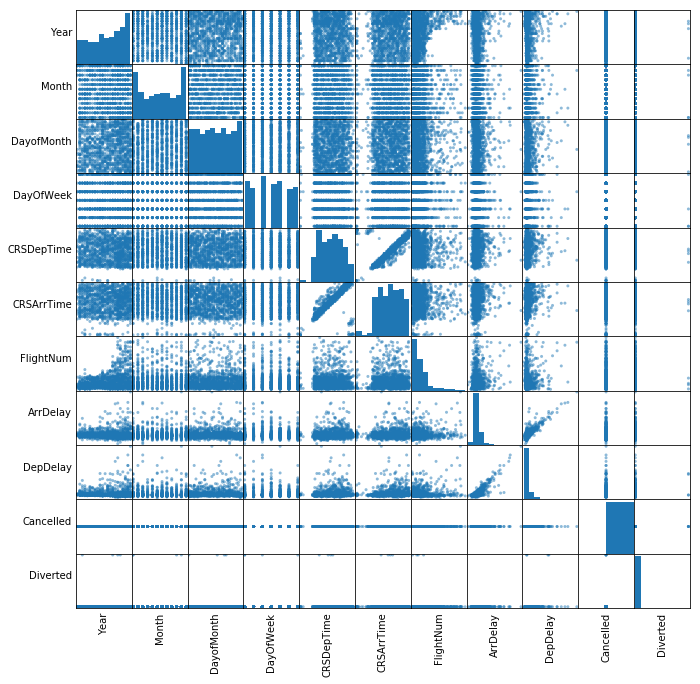

In [23]:
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(11, 11));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

What are your observations?

In [24]:
%%time
for c in numeric_features:
    print("Correlation to departure delay for ", c, df_clean.stat.corr('DepDelay',c))

Correlation to departure delay for  Year 0.03238547729763615
Correlation to departure delay for  Month -0.005716944856280414
Correlation to departure delay for  DayofMonth 0.009263907134515208
Correlation to departure delay for  DayOfWeek 0.011611223003812765
Correlation to departure delay for  CRSDepTime 0.1200280401653916
Correlation to departure delay for  CRSArrTime 0.11472551462110998
Correlation to departure delay for  FlightNum 0.01848300178653273
Correlation to departure delay for  ArrDelay 0.8636591741936076
Correlation to departure delay for  DepDelay 1.0
Correlation to departure delay for  Cancelled 0.004326169544791447
Correlation to departure delay for  Diverted 0.041851953429586475
CPU times: user 21.8 ms, sys: 9.05 ms, total: 30.9 ms
Wall time: 15.1 s


In [25]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols=['Month','DayofMonth','DayOfWeek'], outputCol = 'features')
v_df = vectorAssembler.transform(df_clean)
v_df = v_df.select(['features','DepDelay'])
v_df.show(10)

+--------------+--------+
|      features|DepDelay|
+--------------+--------+
|[1.0,17.0,3.0]|      -4|
|[1.0,18.0,4.0]|      -5|
|[1.0,19.0,5.0]|      11|
|[1.0,20.0,6.0]|      -3|
|[1.0,21.0,7.0]|       0|
|[1.0,22.0,1.0]|      -3|
|[1.0,23.0,2.0]|      -8|
|[1.0,24.0,3.0]|      -6|
|[1.0,25.0,4.0]|       2|
|[1.0,26.0,5.0]|       2|
+--------------+--------+
only showing top 10 rows



In [26]:
splits = v_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [27]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='DepDelay', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.00290187964290683,0.04512128419749819]
Intercept: 7.946640804531522


In [28]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 28.505918
r2: 0.000079


In [29]:
train_df.describe().show()

+-------+------------------+
|summary|          DepDelay|
+-------+------------------+
|  count|          84861655|
|   mean| 8.170249908512861|
| stddev|28.507042367226255|
|    min|             -1370|
|    max|              2601|
+-------+------------------+



In [30]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","DepDelay","features").show()

+-----------------+--------+-------------+
|       prediction|DepDelay|     features|
+-----------------+--------+-------------+
|7.994663968371927|     -35|[1.0,1.0,1.0]|
|7.994663968371927|     -27|[1.0,1.0,1.0]|
|7.994663968371927|     -24|[1.0,1.0,1.0]|
|7.994663968371927|     -15|[1.0,1.0,1.0]|
|7.994663968371927|     -13|[1.0,1.0,1.0]|
|7.994663968371927|     -12|[1.0,1.0,1.0]|
|7.994663968371927|     -11|[1.0,1.0,1.0]|
|7.994663968371927|     -11|[1.0,1.0,1.0]|
|7.994663968371927|     -10|[1.0,1.0,1.0]|
|7.994663968371927|     -10|[1.0,1.0,1.0]|
|7.994663968371927|     -10|[1.0,1.0,1.0]|
|7.994663968371927|     -10|[1.0,1.0,1.0]|
|7.994663968371927|      -9|[1.0,1.0,1.0]|
|7.994663968371927|      -9|[1.0,1.0,1.0]|
|7.994663968371927|      -9|[1.0,1.0,1.0]|
|7.994663968371927|      -9|[1.0,1.0,1.0]|
|7.994663968371927|      -9|[1.0,1.0,1.0]|
|7.994663968371927|      -9|[1.0,1.0,1.0]|
|7.994663968371927|      -9|[1.0,1.0,1.0]|
|7.994663968371927|      -8|[1.0,1.0,1.0]|
+----------

In [31]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="DepDelay",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 7.93346e-05


In [32]:
!bash stop_spark_cluster.sh

Stopping Spark cluster:
node0355.palmetto.clemson.edu: stopping org.apache.spark.deploy.worker.Worker
node0317.palmetto.clemson.edu: stopping org.apache.spark.deploy.worker.Worker
node0442.palmetto.clemson.edu: stopping org.apache.spark.deploy.worker.Worker
stopping org.apache.spark.deploy.master.Master
